## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  38.793222   934.017974  0.417127  7.474095  1.356281
1   1.162936   203.124430  0.540157  7.885200  1.512988
2  78.734209   537.208398  0.387642  9.965676  0.874987
3  57.766007  1060.999015  0.603540  5.476805  1.243730
4  56.099757  1115.933771  0.050360  9.511143  0.832761


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.027471
0:	learn: 1.0267866	total: 59.9ms	remaining: 59.9s
1:	learn: 1.0160835	total: 60.5ms	remaining: 30.2s
2:	learn: 1.0063161	total: 60.9ms	remaining: 20.3s
3:	learn: 0.9966909	total: 61.4ms	remaining: 15.3s
4:	learn: 0.9863337	total: 62.1ms	remaining: 12.4s
5:	learn: 0.9753745	total: 62.6ms	remaining: 10.4s
6:	learn: 0.9651847	total: 63.3ms	remaining: 8.98s
7:	learn: 0.9538658	total: 63.8ms	remaining: 7.91s
8:	learn: 0.9439726	total: 64.6ms	remaining: 7.11s


9:	learn: 0.9324962	total: 65.8ms	remaining: 6.51s
10:	learn: 0.9224557	total: 66.6ms	remaining: 5.99s
11:	learn: 0.9134063	total: 67.5ms	remaining: 5.56s
12:	learn: 0.9023432	total: 68ms	remaining: 5.16s
13:	learn: 0.8924723	total: 69.4ms	remaining: 4.88s
14:	learn: 0.8833987	total: 70.3ms	remaining: 4.61s
15:	learn: 0.8739786	total: 71.1ms	remaining: 4.37s
16:	learn: 0.8636743	total: 72.1ms	remaining: 4.17s
17:	learn: 0.8548862	total: 72.8ms	remaining: 3.97s
18:	learn: 0.8469758	total: 73.5ms	remaining: 3.79s
19:	learn: 0.8367639	total: 74.6ms	remaining: 3.66s
20:	learn: 0.8265795	total: 75.3ms	remaining: 3.51s
21:	learn: 0.8172818	total: 76ms	remaining: 3.38s
22:	learn: 0.8088329	total: 76.7ms	remaining: 3.26s
23:	learn: 0.8003640	total: 77.3ms	remaining: 3.15s
24:	learn: 0.7922469	total: 78ms	remaining: 3.04s
25:	learn: 0.7851545	total: 78.6ms	remaining: 2.94s
26:	learn: 0.7775362	total: 79.2ms	remaining: 2.85s
27:	learn: 0.7690244	total: 79.8ms	remaining: 2.77s
28:	learn: 0.761125

206:	learn: 0.2734609	total: 168ms	remaining: 642ms
207:	learn: 0.2725780	total: 168ms	remaining: 640ms
208:	learn: 0.2713347	total: 168ms	remaining: 637ms
209:	learn: 0.2703019	total: 169ms	remaining: 635ms
210:	learn: 0.2695106	total: 169ms	remaining: 632ms
211:	learn: 0.2685070	total: 169ms	remaining: 630ms
212:	learn: 0.2676430	total: 170ms	remaining: 627ms
213:	learn: 0.2671160	total: 170ms	remaining: 625ms
214:	learn: 0.2663878	total: 170ms	remaining: 622ms
215:	learn: 0.2656735	total: 171ms	remaining: 620ms
216:	learn: 0.2653836	total: 171ms	remaining: 617ms
217:	learn: 0.2648357	total: 172ms	remaining: 618ms
218:	learn: 0.2637342	total: 174ms	remaining: 619ms
219:	learn: 0.2632599	total: 175ms	remaining: 619ms
220:	learn: 0.2619654	total: 175ms	remaining: 617ms
221:	learn: 0.2610503	total: 177ms	remaining: 619ms
222:	learn: 0.2603044	total: 177ms	remaining: 617ms
223:	learn: 0.2596256	total: 178ms	remaining: 615ms
224:	learn: 0.2589506	total: 178ms	remaining: 613ms
225:	learn: 

329:	learn: 0.2010525	total: 224ms	remaining: 454ms
330:	learn: 0.2004153	total: 225ms	remaining: 454ms
331:	learn: 0.1993495	total: 225ms	remaining: 453ms
332:	learn: 0.1990649	total: 225ms	remaining: 451ms
333:	learn: 0.1987771	total: 226ms	remaining: 450ms
334:	learn: 0.1977004	total: 226ms	remaining: 449ms
335:	learn: 0.1962588	total: 226ms	remaining: 447ms
336:	learn: 0.1954077	total: 227ms	remaining: 447ms
337:	learn: 0.1945752	total: 227ms	remaining: 445ms
338:	learn: 0.1932192	total: 228ms	remaining: 444ms
339:	learn: 0.1918930	total: 228ms	remaining: 443ms
340:	learn: 0.1916237	total: 229ms	remaining: 442ms
341:	learn: 0.1913496	total: 229ms	remaining: 440ms
342:	learn: 0.1900167	total: 229ms	remaining: 439ms
343:	learn: 0.1887135	total: 230ms	remaining: 438ms
344:	learn: 0.1878272	total: 230ms	remaining: 437ms
345:	learn: 0.1870008	total: 231ms	remaining: 437ms
346:	learn: 0.1861832	total: 231ms	remaining: 435ms
347:	learn: 0.1857113	total: 232ms	remaining: 434ms
348:	learn: 

455:	learn: 0.1268126	total: 319ms	remaining: 381ms
456:	learn: 0.1260233	total: 320ms	remaining: 380ms
457:	learn: 0.1252515	total: 321ms	remaining: 379ms
458:	learn: 0.1249096	total: 321ms	remaining: 378ms
459:	learn: 0.1245760	total: 321ms	remaining: 377ms
460:	learn: 0.1240215	total: 322ms	remaining: 377ms
461:	learn: 0.1234247	total: 323ms	remaining: 376ms
462:	learn: 0.1225870	total: 323ms	remaining: 375ms


463:	learn: 0.1220058	total: 323ms	remaining: 374ms
464:	learn: 0.1211920	total: 324ms	remaining: 373ms
465:	learn: 0.1203996	total: 324ms	remaining: 372ms
466:	learn: 0.1199703	total: 325ms	remaining: 371ms
467:	learn: 0.1194069	total: 328ms	remaining: 372ms
468:	learn: 0.1188563	total: 334ms	remaining: 378ms
469:	learn: 0.1183183	total: 335ms	remaining: 378ms
470:	learn: 0.1175541	total: 335ms	remaining: 377ms
471:	learn: 0.1168100	total: 336ms	remaining: 376ms
472:	learn: 0.1165154	total: 336ms	remaining: 375ms
473:	learn: 0.1161046	total: 337ms	remaining: 374ms
474:	learn: 0.1157050	total: 337ms	remaining: 373ms
475:	learn: 0.1152124	total: 338ms	remaining: 372ms
476:	learn: 0.1149284	total: 338ms	remaining: 371ms
477:	learn: 0.1142786	total: 338ms	remaining: 370ms
478:	learn: 0.1136457	total: 339ms	remaining: 369ms
479:	learn: 0.1132217	total: 339ms	remaining: 368ms
480:	learn: 0.1126055	total: 340ms	remaining: 367ms
481:	learn: 0.1123387	total: 340ms	remaining: 366ms
482:	learn: 

552:	learn: 0.0903416	total: 392ms	remaining: 317ms
553:	learn: 0.0899211	total: 393ms	remaining: 316ms
554:	learn: 0.0896942	total: 393ms	remaining: 315ms
555:	learn: 0.0894712	total: 394ms	remaining: 314ms
556:	learn: 0.0891695	total: 395ms	remaining: 314ms
557:	learn: 0.0889635	total: 395ms	remaining: 313ms
558:	learn: 0.0887890	total: 396ms	remaining: 312ms
559:	learn: 0.0885705	total: 396ms	remaining: 311ms
560:	learn: 0.0884171	total: 397ms	remaining: 310ms
561:	learn: 0.0882456	total: 397ms	remaining: 309ms
562:	learn: 0.0879992	total: 398ms	remaining: 309ms
563:	learn: 0.0878493	total: 398ms	remaining: 308ms
564:	learn: 0.0876804	total: 398ms	remaining: 307ms
565:	learn: 0.0875334	total: 399ms	remaining: 306ms
566:	learn: 0.0873670	total: 399ms	remaining: 305ms
567:	learn: 0.0872035	total: 400ms	remaining: 304ms
568:	learn: 0.0870591	total: 400ms	remaining: 303ms
569:	learn: 0.0868981	total: 401ms	remaining: 302ms
570:	learn: 0.0867564	total: 401ms	remaining: 301ms
571:	learn: 

608:	learn: 0.0809952	total: 421ms	remaining: 270ms
609:	learn: 0.0809310	total: 421ms	remaining: 269ms
610:	learn: 0.0808300	total: 421ms	remaining: 268ms
611:	learn: 0.0807043	total: 422ms	remaining: 267ms
612:	learn: 0.0806413	total: 423ms	remaining: 267ms
613:	learn: 0.0804415	total: 423ms	remaining: 266ms
614:	learn: 0.0803754	total: 424ms	remaining: 265ms
615:	learn: 0.0803101	total: 424ms	remaining: 264ms
616:	learn: 0.0801208	total: 425ms	remaining: 264ms
617:	learn: 0.0800590	total: 425ms	remaining: 263ms
618:	learn: 0.0798917	total: 426ms	remaining: 262ms
619:	learn: 0.0795250	total: 426ms	remaining: 261ms
620:	learn: 0.0794035	total: 426ms	remaining: 260ms
621:	learn: 0.0790478	total: 427ms	remaining: 259ms
622:	learn: 0.0789358	total: 427ms	remaining: 259ms
623:	learn: 0.0788758	total: 428ms	remaining: 258ms
624:	learn: 0.0788129	total: 429ms	remaining: 257ms
625:	learn: 0.0787510	total: 429ms	remaining: 256ms
626:	learn: 0.0785859	total: 430ms	remaining: 256ms
627:	learn: 

795:	learn: 0.0523750	total: 542ms	remaining: 139ms
796:	learn: 0.0520894	total: 556ms	remaining: 142ms
797:	learn: 0.0520509	total: 556ms	remaining: 141ms
798:	learn: 0.0517724	total: 558ms	remaining: 140ms
799:	learn: 0.0516880	total: 558ms	remaining: 139ms
800:	learn: 0.0515501	total: 558ms	remaining: 139ms
801:	learn: 0.0514678	total: 559ms	remaining: 138ms
802:	learn: 0.0514308	total: 560ms	remaining: 137ms
803:	learn: 0.0511597	total: 560ms	remaining: 137ms
804:	learn: 0.0510632	total: 561ms	remaining: 136ms
805:	learn: 0.0510270	total: 561ms	remaining: 135ms
806:	learn: 0.0507944	total: 562ms	remaining: 134ms
807:	learn: 0.0507590	total: 562ms	remaining: 134ms
808:	learn: 0.0504972	total: 562ms	remaining: 133ms
809:	learn: 0.0504181	total: 563ms	remaining: 132ms
810:	learn: 0.0503829	total: 563ms	remaining: 131ms
811:	learn: 0.0501592	total: 563ms	remaining: 130ms
812:	learn: 0.0501230	total: 564ms	remaining: 130ms
813:	learn: 0.0500871	total: 564ms	remaining: 129ms
814:	learn: 

833:	learn: 0.0477288	total: 573ms	remaining: 114ms
834:	learn: 0.0476068	total: 574ms	remaining: 113ms
835:	learn: 0.0474336	total: 575ms	remaining: 113ms
836:	learn: 0.0472949	total: 575ms	remaining: 112ms
837:	learn: 0.0471907	total: 576ms	remaining: 111ms
838:	learn: 0.0470426	total: 576ms	remaining: 111ms
839:	learn: 0.0469257	total: 576ms	remaining: 110ms
840:	learn: 0.0468231	total: 577ms	remaining: 109ms
841:	learn: 0.0466573	total: 578ms	remaining: 108ms
842:	learn: 0.0465606	total: 578ms	remaining: 108ms
843:	learn: 0.0464609	total: 579ms	remaining: 107ms
844:	learn: 0.0463304	total: 579ms	remaining: 106ms
845:	learn: 0.0461730	total: 580ms	remaining: 106ms
846:	learn: 0.0460998	total: 580ms	remaining: 105ms
847:	learn: 0.0460283	total: 580ms	remaining: 104ms
848:	learn: 0.0459306	total: 581ms	remaining: 103ms
849:	learn: 0.0458377	total: 581ms	remaining: 103ms
850:	learn: 0.0457422	total: 582ms	remaining: 102ms
851:	learn: 0.0456086	total: 596ms	remaining: 104ms
852:	learn: 

958:	learn: 0.0366610	total: 680ms	remaining: 29.1ms
959:	learn: 0.0366180	total: 680ms	remaining: 28.3ms
960:	learn: 0.0365800	total: 681ms	remaining: 27.6ms
961:	learn: 0.0364295	total: 681ms	remaining: 26.9ms
962:	learn: 0.0363437	total: 682ms	remaining: 26.2ms
963:	learn: 0.0363048	total: 682ms	remaining: 25.5ms
964:	learn: 0.0361584	total: 683ms	remaining: 24.8ms
965:	learn: 0.0360637	total: 683ms	remaining: 24ms
966:	learn: 0.0359838	total: 683ms	remaining: 23.3ms
967:	learn: 0.0359457	total: 684ms	remaining: 22.6ms
968:	learn: 0.0358994	total: 684ms	remaining: 21.9ms
969:	learn: 0.0358580	total: 685ms	remaining: 21.2ms
970:	learn: 0.0358206	total: 685ms	remaining: 20.5ms
971:	learn: 0.0357831	total: 686ms	remaining: 19.8ms
972:	learn: 0.0357002	total: 686ms	remaining: 19ms
973:	learn: 0.0356634	total: 687ms	remaining: 18.3ms
974:	learn: 0.0355215	total: 687ms	remaining: 17.6ms
975:	learn: 0.0354298	total: 687ms	remaining: 16.9ms
976:	learn: 0.0353927	total: 688ms	remaining: 16.2

978:	learn: 0.0352787	total: 691ms	remaining: 14.8ms
979:	learn: 0.0352421	total: 691ms	remaining: 14.1ms
980:	learn: 0.0351053	total: 692ms	remaining: 13.4ms
981:	learn: 0.0350252	total: 692ms	remaining: 12.7ms
982:	learn: 0.0349578	total: 693ms	remaining: 12ms
983:	learn: 0.0349216	total: 693ms	remaining: 11.3ms
984:	learn: 0.0348051	total: 693ms	remaining: 10.6ms
985:	learn: 0.0347393	total: 694ms	remaining: 9.85ms
986:	learn: 0.0346250	total: 694ms	remaining: 9.14ms
987:	learn: 0.0345149	total: 694ms	remaining: 8.43ms
988:	learn: 0.0344272	total: 695ms	remaining: 7.73ms
989:	learn: 0.0343201	total: 695ms	remaining: 7.02ms
990:	learn: 0.0342121	total: 695ms	remaining: 6.32ms
991:	learn: 0.0341075	total: 696ms	remaining: 5.61ms
992:	learn: 0.0339744	total: 696ms	remaining: 4.91ms
993:	learn: 0.0339530	total: 697ms	remaining: 4.21ms
994:	learn: 0.0339147	total: 697ms	remaining: 3.5ms
995:	learn: 0.0338067	total: 697ms	remaining: 2.8ms
996:	learn: 0.0337871	total: 698ms	remaining: 2.1m

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.41166053869313124


ABC Pre-generator MAE 0.7003076966880792


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

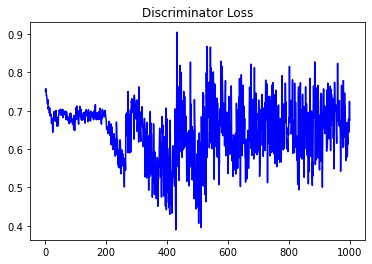

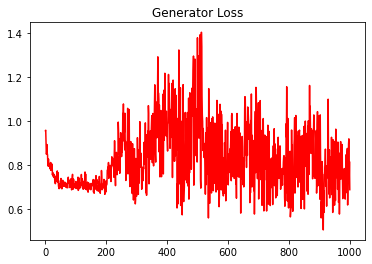

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.6005698674656451


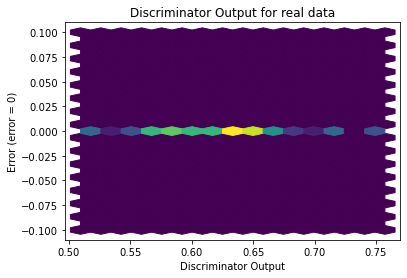

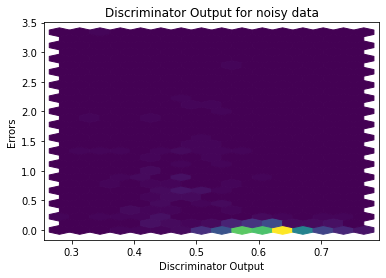

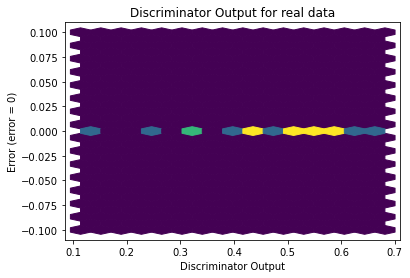

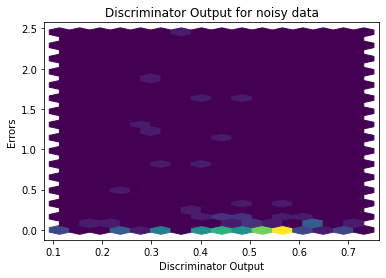

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

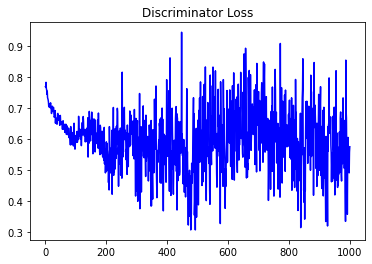

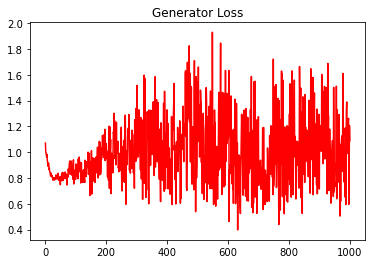

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.8792150292024017


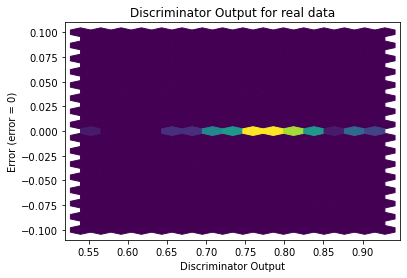

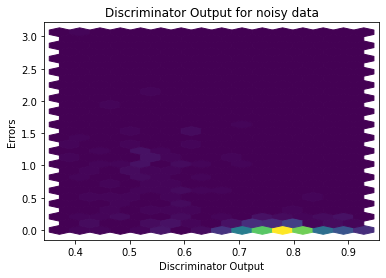

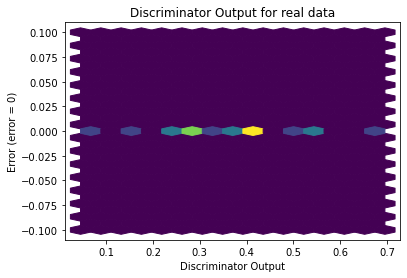

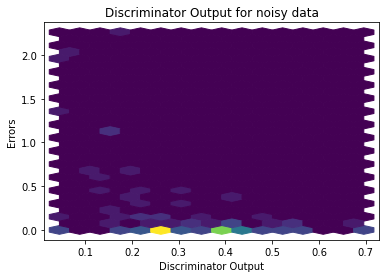

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


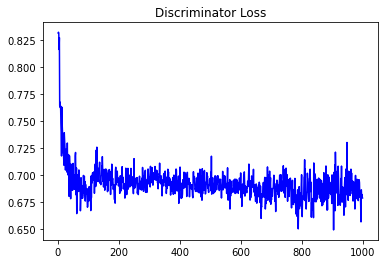

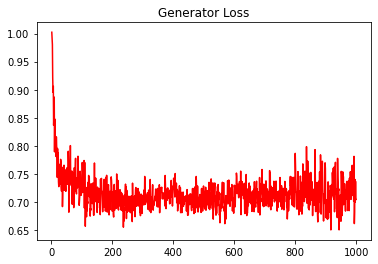

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
1.2449201287776233


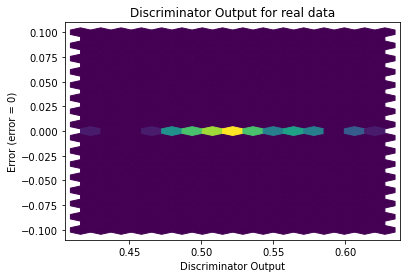

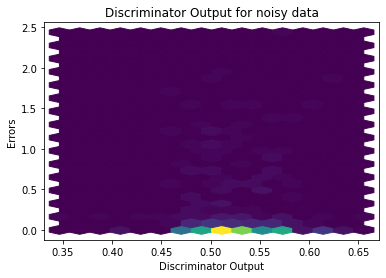

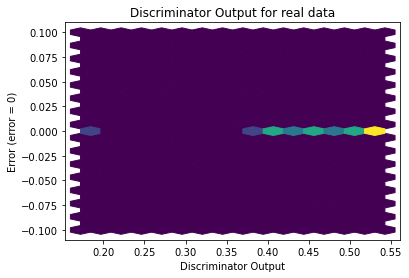

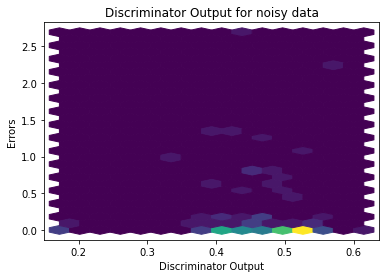

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.DiscriminatorTabnet(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


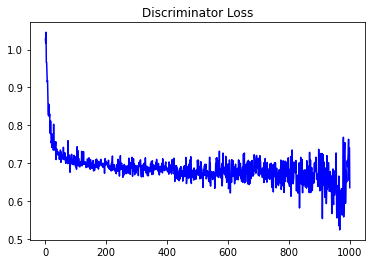

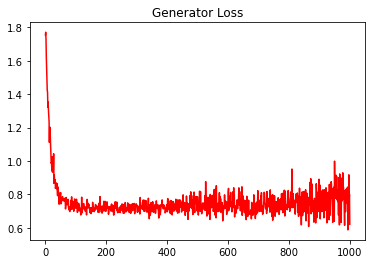

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
1.0016911383178084


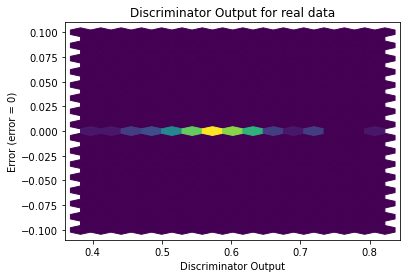

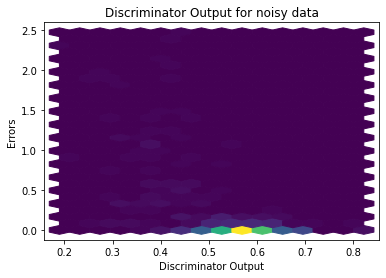

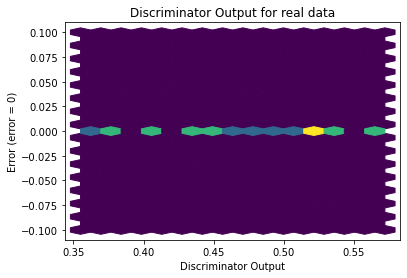

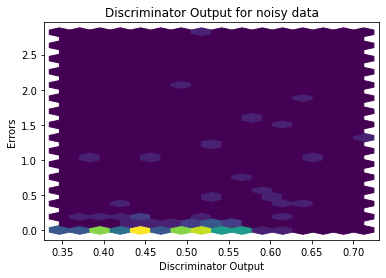

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1692]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.4947]], requires_grad=True)
